In [2]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram


%run DataAnalysis.ipynb

In [3]:
data = DataAnalysis()
data.load_eventdf('data/new_moo/8-5/events.csv')
data.load_clusterdf('data/new_moo/8-5/clusters.csv')

data.filter_fit(3.5,5)

In [3]:
data.get_clusterdf()

Cluster  Events  Channels    StartTime  TimeSpread     NRMSE    Zenith  \
0          0       7         7     5116.891       0.490  1.012483  0.441830   
1          1       6         6     7194.337       0.502  0.722125  0.393341   
3          3       6         5    26158.403       0.232  1.708888  0.376968   
4          4       6         6    27250.906       1.288  1.135702  0.956043   
5          5       6         6    29660.033       0.226  1.262664  0.601920   
..       ...     ...       ...          ...         ...       ...       ...   
500      500      11         8  2710760.519       0.903  2.269432  0.613977   
502      502      11        11  2728511.764       0.730  0.955817  0.555447   
504      504       8         8  2747006.328       0.537  0.946652  1.160684   
505      505       5         5  2747961.339       0.108  1.460649  1.170482   
506      506       8         8  2752773.395       0.908  1.662591  0.904549   

      Azimuth  ExtraCh  MissingCh         dEdx  dEdx_err  \
0   -0.952643        0          0   935.853522  0.955397   
1   -0.831303        0          0   640.521993  1.000000   
3   -1.216942        0          1   270.877879 -0.394529   
4   -1.066687        0          0   454.386552  0.999037   
5    0.623499        0          0  1946.794042  0.815110   
..        ...      ...        ...          ...       ...   
500 -0.664214        6          4   214.270589 -0.023160   
502 -1.393332        1          0   592.479057  0.710329   
504  1.151878        0          0   957.490776  0.999999   
505  0.183313        0          2   689.967667  0.999909   
506  1.236050        1          2   671.020078  0.090777   

                                               Fitline  
0    [-26.790787, -186.782533, 314.256173, -0.40587...  
1    [107.655665, 51.291938, 213.010074, -0.375728,...  
3    [331.682932, -129.532342, 152.068263, -0.30700...  
4    [129.162984, 273.815651, -361.712807, 0.741118...  
5    [191.090568, -243.315474, 69.36217, 0.175313, ...  
..                                                 ...  
500  [324.375936, 151.470611, -331.108972, -0.57583...  
502  [-45.26645, -259.753158, 267.612547, -0.381923...  
504  [-38.336701, 309.127043, -173.485405, 0.194391...  
505  [-303.553638, -188.855244, -315.876977, 0.6310...  
506  [-279.65733, 129.01027, -90.249873, 0.23064, -...  

[344 rows x 13 columns]

In [4]:
data.get_clusterdf()[data.get_clusterdf()['dEdx_err'] > .9].head(10)

Cluster  Events  Channels   StartTime  TimeSpread     NRMSE    Zenith  \
0         0       7         7    5116.891       0.490  1.012483  0.441830   
1         1       6         6    7194.337       0.502  0.722125  0.393341   
4         4       6         6   27250.906       1.288  1.135702  0.956043   
6         6       8         8   37039.429       0.846  1.398896  0.753760   
11       11      12        12   88352.211       0.822  0.879773  0.705153   
20       20      11        11   94865.726       0.641  1.698816  0.425124   
21       21      10        10  105766.799       0.711  1.657402  1.067649   
23       23       7         7  112738.540       0.253  0.816598  0.382925   
24       24       7         7  127218.780       0.746  0.881683  0.351780   
25       25       5         5  129630.215       0.206  1.214367  0.557419   

     Azimuth  ExtraCh  MissingCh         dEdx  dEdx_err  \
0  -0.952643        0          0   935.853522  0.955397   
1  -0.831303        0          0   640.521993  1.000000   
4  -1.066687        0          0   454.386552  0.999037   
6  -1.289496        0          1   715.887546  0.999512   
11  0.940938        0          0   423.687623  0.974520   
20  1.542064        0          4  2378.846508  1.000000   
21 -1.167519        0          2   324.284349  0.961908   
23 -1.519427        0          0   434.887289  0.999969   
24  1.358706        0          0   441.302012  0.999998   
25 -0.588463        0          0   415.124887  1.000000   

                                              Fitline  
0   [-26.790787, -186.782533, 314.256173, -0.40587...  
1   [107.655665, 51.291938, 213.010074, -0.375728,...  
4   [129.162984, 273.815651, -361.712807, 0.741118...  
6   [121.062215, -240.955062, -129.003499, -0.5419...  
11  [-103.456086, -263.226243, 109.742629, -0.0017...  
20  [-157.305626, -271.100764, 6.79739, -0.234161,...  
21  [262.226874, -13.278101, -206.513781, -0.75365...  
23  [54.836694, 330.989691, 266.479338, 0.236064, ...  
24  [21.492421, 170.792623, -218.920045, 0.140633,...  
25  [268.924383, -95.485041, -242.946438, 0.528485...

In [33]:
large_non_sats = []
for c in data.get_clusterdf()['Cluster'].values:
    cluster = data.get_cluster(c)
    r2 = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['dEdx_err'].values[0]
    
    if len(cluster[(cluster['IsSaturated']==False) & (cluster['Hit'])==True]) >=4 and r2 > .5:
        large_non_sats.append(c)

np.array(large_non_sats)

array([  5,  11,  21,  39,  42,  59, 108, 112, 129, 130, 144, 152, 155,
       156, 162, 165, 177, 193, 196, 207, 217, 222, 232, 233, 234, 236,
       254, 264, 271, 272, 284, 311, 330, 333, 365, 368, 376, 377, 380,
       387, 391, 397, 404, 405, 407, 414, 435, 454, 455, 456, 465, 472,
       480, 487, 492])

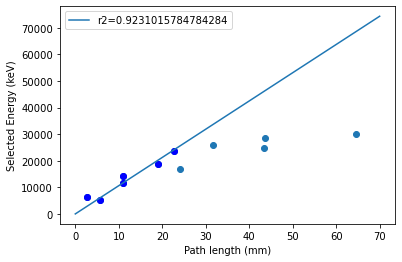

(1062.7295892566276, 0.9231015784784284)

In [24]:
c = 42
plt.scatter(data.get_cluster(c)['PathLength'], data.get_cluster(c)['SelectedEnergy'])

fitline = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['Fitline'].values[0]
data.dEdx(data.get_cluster(c), fitline, show_graph=True)

In [7]:
data.get_cluster(c)

Run  Channel         Time  NumPulses   OFdelay  MaxPosInWindow  \
7663  350280      747  1771190.768          1  3.171765           2.945   
7664  350280      739  1771190.736          1  3.119902           3.114   
7665  350280      668  1771190.752          1  3.130720           3.120   
7666  350280      924  1771190.752          1  3.142460           3.127   
7667  350280      746  1771190.760          1  3.162006           3.146   
7668  350280      735  1771190.768          1  3.153288           3.146   
7669  350280      808  1771190.760          1  3.177250           3.182   
7670  350280      821  1771190.776          1  3.187231           3.177   
7671  350280      748  1771190.784          1  3.195397           3.184   
7672  350280      822  1771190.728          1  3.170692           3.397   

      SelectedEnergy     Baseline  MaxToBaseline       StabAmp  IsSaturated  \
7663    26856.914346 -3642.913498   13089.725174  9.999999e+06         True   
7664     6019.641334 -4185.581085    3073.993561  7.928058e+03        False   
7665    13570.622271 -5784.926066    6456.316600  1.742113e+04        False   
7666    20417.286275 -2142.434367   10537.499674  2.453731e+04        False   
7667     9608.382040 -3362.627777    6617.281708  9.999999e+06        False   
7668     5355.101976 -4360.222341    3438.332082  7.103873e+03        False   
7669    25194.050613 -6049.002106   15665.964539  3.247684e+04         True   
7670     7525.485162 -4434.595311    5416.166509  9.999999e+06        False   
7671     6288.443984 -4114.056920    5798.901891  9.999999e+06        False   
7672    33377.463440 -5522.272863   15156.058111  9.999999e+06         True   

          MaxTime  Cluster    Hit  PathLength  
7663  1771193.713      368   True   48.176731  
7664  1771193.850      368  False         NaN  
7665  1771193.872      368   True   11.616850  
7666  1771193.879      368   True   19.062317  
7667  1771193.906      368  False         NaN  
7668  1771193.914      368   True    1.906853  
7669  1771193.942      368   True   33.710268  
7670  1771193.953      368   True    6.058318  
7671  1771193.968      368   True    7.734276  
7672  1771194.125      368   True   49.852688

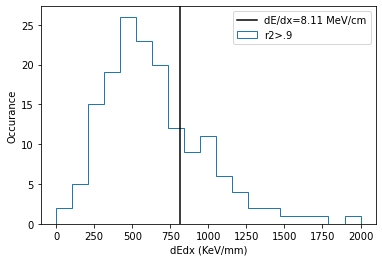

In [8]:
df = data.get_clusterdf()[data.get_clusterdf()['dEdx_err'] > .9]

#array = plt.hist(data.get_clusterdf()['dEdx'], np.linspace(0,2000,20), histtype='step')
array = plt.hist(df['dEdx'], np.linspace(0,2000,20),histtype='step', label='r2>.9')
plt.axvline(811, color='black', label='dE/dx=8.11 MeV/cm')

plt.xlabel("dEdx (KeV/mm)")
plt.ylabel("Occurance")
plt.legend()

In [1]:
df = data.get_clusterdf()[data.get_clusterdf()['Cluster'].isin(large_non_sats)]

#array = plt.hist(data.get_clusterdf()['dEdx'], np.linspace(0,2000,20), histtype='step')
array = plt.hist(df['dEdx'], np.linspace(0,2000,10),histtype='step', label='r2>.9')
#plt.axvline(811, color='black', label='dE/dx=8.11 MeV/cm')

plt.title("\"Large\" Num (>3) of Non-Sat Clusters")
plt.xlabel("dEdx (KeV/mm)")
plt.ylabel("Occurance")
plt.legend()

NameError: name 'data' is not defined

Text(0, 0.5, 'Num')

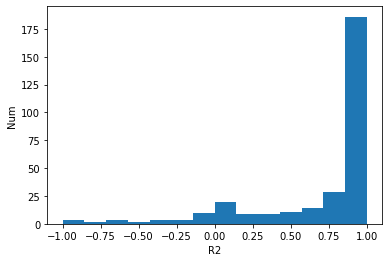

In [10]:
array = plt.hist(data.get_clusterdf()['dEdx_err'], np.linspace(-1,1,15))
plt.xlabel("R2")
plt.ylabel("Num")

Text(0, 0.5, 'R2')

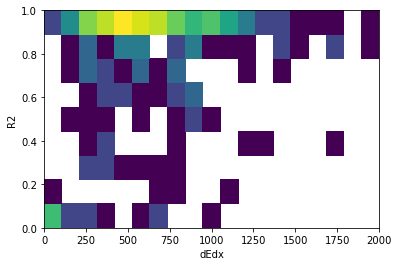

In [11]:
array = plt.hist2d(data.get_clusterdf()['dEdx'], data.get_clusterdf()['dEdx_err'],  [np.linspace(0,2000,20), np.linspace(0,1,10)], norm=LogNorm())
plt.xlabel("dEdx")
plt.ylabel("R2")

Text(0.5, 0, 'Pathlength (mm)')

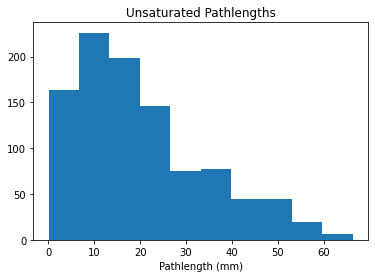

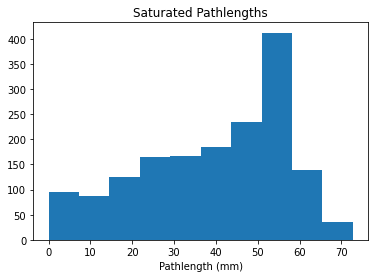

In [97]:
plt.figure()
array = plt.hist(data.get_eventdf()[(data.get_eventdf()['IsSaturated']==False) & (data.get_eventdf()['Hit']==True)]['PathLength'])
plt.title("Unsaturated Pathlengths")
plt.xlabel("Pathlength (mm)")

plt.figure()
array = plt.hist(data.get_eventdf()[(data.get_eventdf()['IsSaturated']==True) & (data.get_eventdf()['Hit']==True)]['PathLength'])

plt.title("Saturated Pathlengths")
plt.xlabel("Pathlength (mm)")



In [12]:
noisydata = copy.deepcopy(data)

In [13]:
#data.filter_noisy()

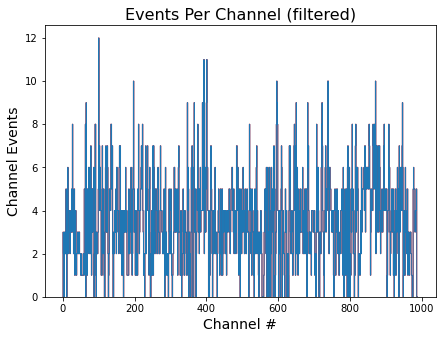

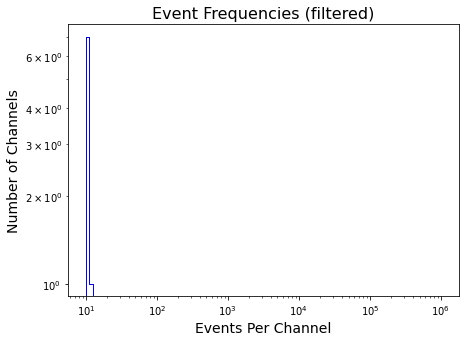

In [14]:
plt.figure(figsize=(7,5)) # lets you make a custom size for your plot
array1=plt.hist(noisydata.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array2=plt.hist(data.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")
#plt.ylim(1,200)


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.logspace(1,6,100), histtype='step', color='r')
plt.hist(array2[0], np.logspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [15]:
quietdata = copy.deepcopy(data)

In [16]:
#data.filter_baseline()

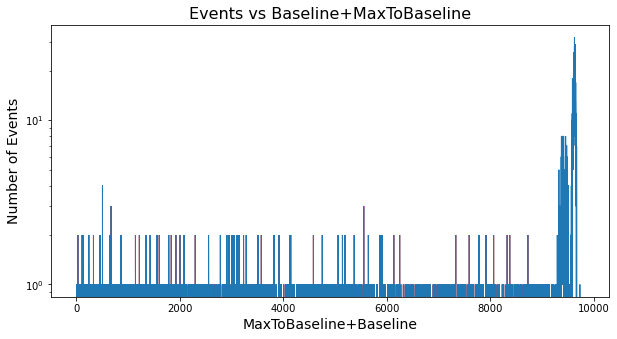

In [17]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Events vs Baseline+MaxToBaseline", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['MaxToBaseline'].values+data.get_eventdf()['Baseline'].values, np.linspace(0,9800,9801), histtype='step')
plt.gca().set_yscale("log")

plt.savefig('plots/pdf/Baseline_MaxToBaseline.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Baseline_MaxToBaseline.png',dpi=300,bbox_inches = "tight")

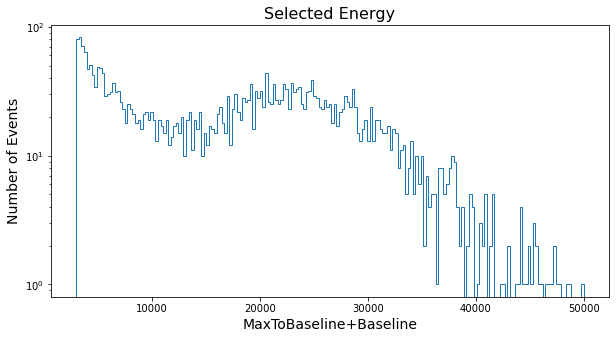

In [18]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')
#array=plt.hist(data.get_cluster(0)['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')


plt.gca().set_yscale("log")


In [19]:
#data = DataAnalysis(load=True, eventfile='data/big_boi/bigeventdf.csv', clusterfile='data/big_boi/bigclusterdf.csv')

In [20]:
#event_threshold = 5
#time_threshold = 1

#data.arrange_clusters(event_threshold, time_threshold)
#data.make_clusterDF()

In [21]:
messydata = copy.deepcopy(data)

In [22]:
messydata.get_clusterdf()

Cluster  Events  Channels    StartTime  TimeSpread     NRMSE    Zenith  \
0          0       7         7     5116.891       0.490  1.012483  0.441830   
1          1       6         6     7194.337       0.502  0.722125  0.393341   
3          3       6         5    26158.403       0.232  1.708888  0.376968   
4          4       6         6    27250.906       1.288  1.135702  0.956043   
5          5       6         6    29660.033       0.226  1.262664  0.601920   
..       ...     ...       ...          ...         ...       ...       ...   
500      500      11         8  2710760.519       0.903  2.269432  0.613977   
502      502      11        11  2728511.764       0.730  0.955817  0.555447   
504      504       8         8  2747006.328       0.537  0.946652  1.160684   
505      505       5         5  2747961.339       0.108  1.460649  1.170482   
506      506       8         8  2752773.395       0.908  1.662591  0.904549   

      Azimuth  ExtraCh  MissingCh         dEdx  dEdx_err  \
0   -0.952643        0          0   935.853522  0.955397   
1   -0.831303        0          0   640.521993  1.000000   
3   -1.216942        0          1   270.877879 -0.394529   
4   -1.066687        0          0   454.386552  0.999037   
5    0.623499        0          0  1946.794042  0.815110   
..        ...      ...        ...          ...       ...   
500 -0.664214        6          4   214.270589 -0.023160   
502 -1.393332        1          0   592.479057  0.710329   
504  1.151878        0          0   957.490776  0.999999   
505  0.183313        0          2   689.967667  0.999909   
506  1.236050        1          2   671.020078  0.090777   

                                               Fitline  
0    [-26.790787, -186.782533, 314.256173, -0.40587...  
1    [107.655665, 51.291938, 213.010074, -0.375728,...  
3    [331.682932, -129.532342, 152.068263, -0.30700...  
4    [129.162984, 273.815651, -361.712807, 0.741118...  
5    [191.090568, -243.315474, 69.36217, 0.175313, ...  
..                                                 ...  
500  [324.375936, 151.470611, -331.108972, -0.57583...  
502  [-45.26645, -259.753158, 267.612547, -0.381923...  
504  [-38.336701, 309.127043, -173.485405, 0.194391...  
505  [-303.553638, -188.855244, -315.876977, 0.6310...  
506  [-279.65733, 129.01027, -90.249873, 0.23064, -...  

[344 rows x 13 columns]

In [23]:
print("Messy cluster rate: " + str(messydata.get_clusterrate()))
data.filter_fit(3.5, 5) #(NRMSE, channels)
print("Filtered cluster rate: " + str(data.get_clusterrate()))

clusters: 344
run time: 2636943.0
Messy cluster rate: 0.00013045409020976184
clusters: 344
run time: 2636943.0
Filtered cluster rate: 0.00013045409020976184


In [24]:
data.get_clusterdf()

Cluster  Events  Channels    StartTime  TimeSpread     NRMSE    Zenith  \
0          0       7         7     5116.891       0.490  1.012483  0.441830   
1          1       6         6     7194.337       0.502  0.722125  0.393341   
3          3       6         5    26158.403       0.232  1.708888  0.376968   
4          4       6         6    27250.906       1.288  1.135702  0.956043   
5          5       6         6    29660.033       0.226  1.262664  0.601920   
..       ...     ...       ...          ...         ...       ...       ...   
500      500      11         8  2710760.519       0.903  2.269432  0.613977   
502      502      11        11  2728511.764       0.730  0.955817  0.555447   
504      504       8         8  2747006.328       0.537  0.946652  1.160684   
505      505       5         5  2747961.339       0.108  1.460649  1.170482   
506      506       8         8  2752773.395       0.908  1.662591  0.904549   

      Azimuth  ExtraCh  MissingCh         dEdx  dEdx_err  \
0   -0.952643        0          0   935.853522  0.955397   
1   -0.831303        0          0   640.521993  1.000000   
3   -1.216942        0          1   270.877879 -0.394529   
4   -1.066687        0          0   454.386552  0.999037   
5    0.623499        0          0  1946.794042  0.815110   
..        ...      ...        ...          ...       ...   
500 -0.664214        6          4   214.270589 -0.023160   
502 -1.393332        1          0   592.479057  0.710329   
504  1.151878        0          0   957.490776  0.999999   
505  0.183313        0          2   689.967667  0.999909   
506  1.236050        1          2   671.020078  0.090777   

                                               Fitline  
0    [-26.790787, -186.782533, 314.256173, -0.40587...  
1    [107.655665, 51.291938, 213.010074, -0.375728,...  
3    [331.682932, -129.532342, 152.068263, -0.30700...  
4    [129.162984, 273.815651, -361.712807, 0.741118...  
5    [191.090568, -243.315474, 69.36217, 0.175313, ...  
..                                                 ...  
500  [324.375936, 151.470611, -331.108972, -0.57583...  
502  [-45.26645, -259.753158, 267.612547, -0.381923...  
504  [-38.336701, 309.127043, -173.485405, 0.194391...  
505  [-303.553638, -188.855244, -315.876977, 0.6310...  
506  [-279.65733, 129.01027, -90.249873, 0.23064, -...  

[344 rows x 13 columns]

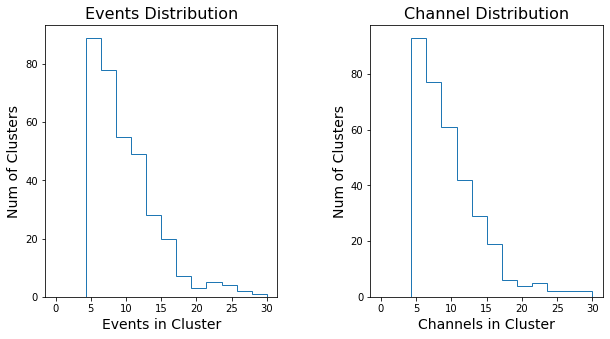

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(data.get_clusterdf()["Events"], np.linspace(0,30,15), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(data.get_clusterdf()["Channels"], np.linspace(0,30,15), histtype='step')


plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

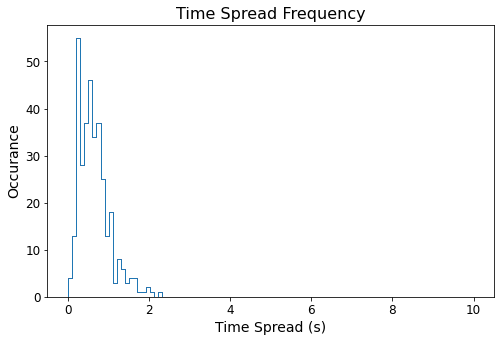

In [26]:
plt.figure(figsize=(8,5))
array = plt.hist(messydata.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step', color='r')
array = plt.hist(data.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step')
plt.title("Time Spread Frequency", fontsize=16)
plt.xlabel("Time Spread (s)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks

#plt.ylim(0,50)

#plt.savefig('plots/pdf/Pre_TimeSpread.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_TimeSpread.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Time Spread Frequency (filtered)", fontsize=16)
#plt.xlabel("Time Spread (s)", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.ylim(0,50)

plt.savefig('plots/pdf/TimeSpread.pdf',bbox_inches = "tight")
plt.savefig('plots/png/TimeSpread.png',dpi=300,bbox_inches = "tight")

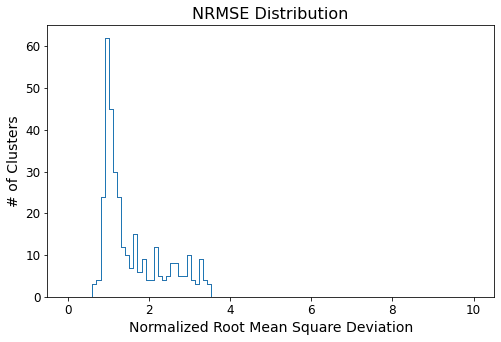

In [27]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(messydata.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step', color='r')
array=plt.hist(data.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step')

#line = plt.axvline(1)

plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

In [28]:
len(data.get_clusterdf())/len(messydata.get_clusterdf())

1.0

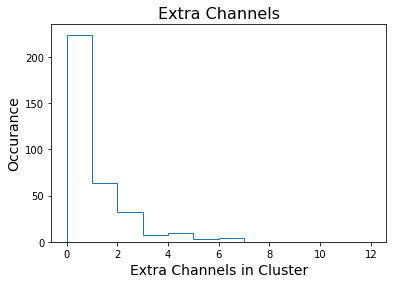

In [29]:
plt.figure()
plt.title("Extra Channels", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

#array = plt.hist(messydata.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), color='r', histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

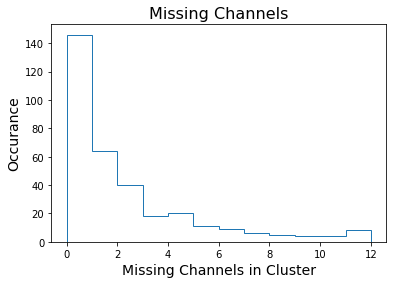

In [30]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
#array = plt.hist(messydata.get_clusterdf()['MissingCh'], np.linspace(0,12,13), color='r', histtype='step')

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)
array = plt.hist(data.get_clusterdf()['MissingCh'], np.linspace(0,12,13), histtype='step')

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


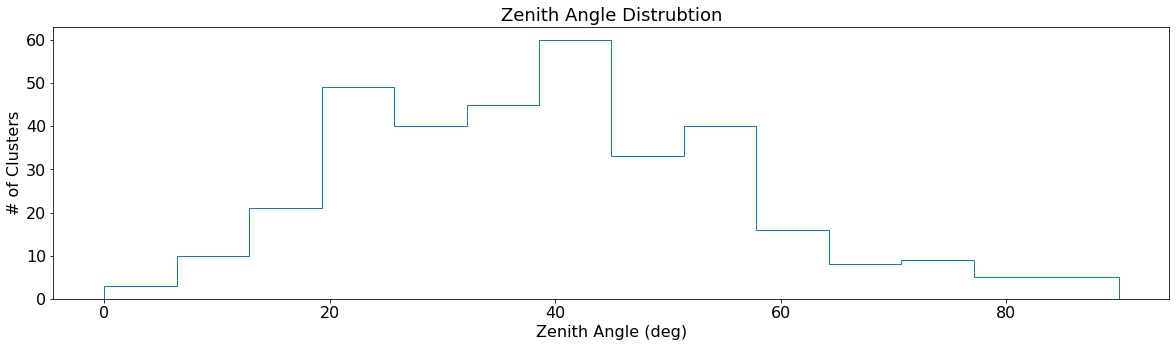

In [31]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (deg)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Zenith'].values], np.linspace(0,90,15), histtype='step')

plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

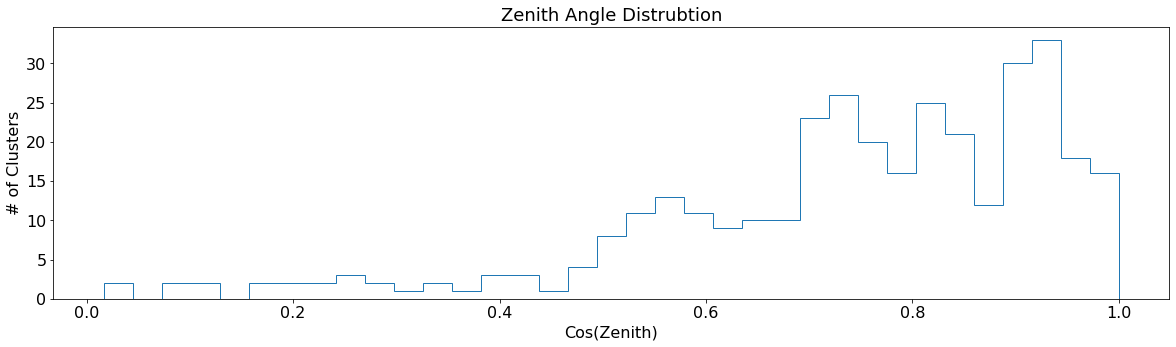

In [34]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], bins=35, histtype='step')
#plt.scatter(cos_theta[:,0], cos_theta[:,1])

plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

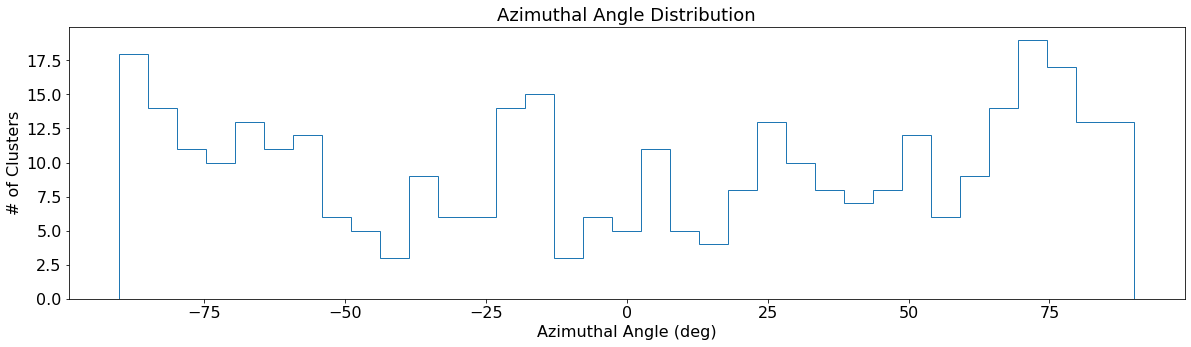

In [35]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (deg)',fontsize=16)

#plt.ylim(0,15)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Azimuth']], np.linspace(-90,90,36), histtype='step')
#plt.scatter(phi[:,0], phi[:,1])


plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

Text(0, 0.5, 'cos(theta)')

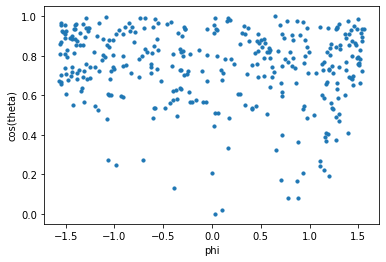

In [32]:
plt.scatter(data.get_clusterdf()['Azimuth'], np.cos(data.get_clusterdf()['Zenith'].values), s=10)
plt.xlabel("phi")
plt.ylabel("cos(theta)")

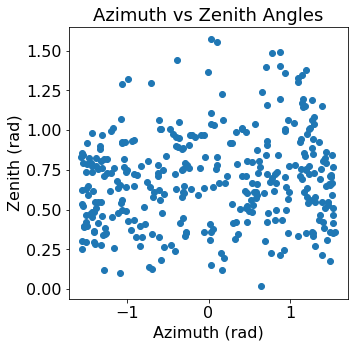

In [38]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth vs Zenith Angles", fontsize=18)
plt.xlabel('Azimuth (rad)',fontsize=16)
plt.ylabel('Zenith (rad)',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], data.get_clusterdf()['Zenith'])

plt.savefig('plots/pdf/Azimuth_vs_Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth_vs_Zenith.png',dpi=300,bbox_inches = "tight")

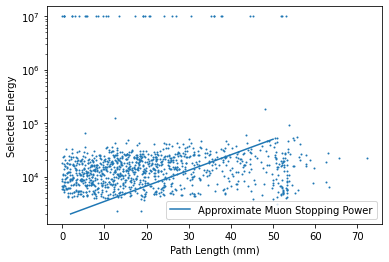

In [39]:
channeldata = data.get_eventdf()[data.get_eventdf()['Channel'] == 819]


quietdata = data.get_eventdf()[(data.get_eventdf()['Baseline'] + data.get_eventdf()['MaxToBaseline']) < 9000]
skim = quietdata[quietdata['PathLength'] < 50]
direct = quietdata[quietdata['PathLength'] > 50]

plt.xlabel("Path Length (mm)")
plt.ylabel("Selected Energy")
plt.scatter(quietdata['PathLength'], quietdata['StabAmp'], s=1)
plt.plot([10/5,10*5], [10000/5, 10000*5], label="Approximate Muon Stopping Power")
plt.legend()

#plt.gca().set_xscale("log")
plt.gca().set_yscale("log")





#plt.figure()

#plt.xlabel("Path Length (mm)")
#plt.ylabel("Selected Energy")
#plt.scatter(direct['PathLength'], direct['SelectedEnergy'], s=5)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")

In [40]:
data.get_eventdf()[(data.get_eventdf()['PathLength'] < 1) & (data.get_eventdf()['SelectedEnergy'] < .5e4)]

Run  Channel         Time  NumPulses   OFdelay  MaxPosInWindow  \
97    350260      740    76693.232          1  3.133213           3.130   
2712  350263      324   318868.336          1  3.139079           3.178   
2793  350264      311   370419.400          2  3.148790           3.266   
3246  350265      955   457469.968          1  3.177726           3.170   
5066  350270      794   946996.296          1  3.180014           3.179   
5919  350274      595  1231761.160          1  3.166241           3.164   
7271  350276      135  1481787.200          1  3.161279           3.161   
8319  350285      515  2221387.648          1  3.176679           3.168   
8947  350289      801  2584045.704          1  3.187486           3.182   
9804  350292      223  2747003.216          1  3.144897           3.136   

      SelectedEnergy     Baseline  MaxToBaseline      StabAmp  IsSaturated  \
97       4903.131051 -4800.488973    3756.112600  6529.992841        False   
2712     4638.277121 -2743.117630    2091.674149  5990.202478        False   
2793     4183.417210 -2307.535253    2300.405584  5791.445352        False   
3246     3674.166506 -3511.127482    3536.361705  5829.656909        False   
5066     4035.924183 -3557.897898    3613.172862  5500.030968        False   
5919     4191.547852 -3279.626892    3204.484985  5737.795078        False   
7271     4943.435798 -3792.263494    3519.012914  6569.691861        False   
8319     3627.611622 -3999.671071    2844.744771  5142.067422        False   
8947     4909.434391 -5792.431071    3357.288554  6664.412564        False   
9804     4889.899344 -3436.164413    1692.279373  6273.911083        False   

          MaxTime  Cluster   Hit  PathLength  
97      76696.362       10  True    0.297412  
2712   318871.514       78  True    0.893113  
2793   370422.666       89  True    0.308324  
3246   457473.138      117  True    0.974874  
5066   946999.475      213  True    0.448797  
5919  1231764.324      272  True    0.036515  
7271  1481790.361      331  True    0.073926  
8319  2221390.816      433  True    0.348171  
8947  2584048.886      480  True    0.588803  
9804  2747006.352      504  True    0.273037

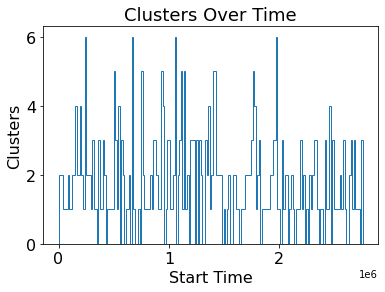

In [44]:
# plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Clusters Over Time", fontsize=18)
plt.ylabel('Clusters',fontsize=16)
plt.xlabel('Start Time',fontsize=16)
array=plt.hist(data.get_clusterdf()['StartTime'], np.linspace(0,2760000,200), histtype='step')
#plt.gca().set_yscale("log")

plt.savefig('plots/pdf/ClusterTimes.pdf',bbox_inches = "tight")
plt.savefig('plots/png/ClusterTimes.png',dpi=300,bbox_inches = "tight")